In [898]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import OrderedDict
from sklearn.metrics import r2_score
import scipy
%matplotlib inline

In [4]:
seseds = pd.read_excel('ProblemCData.xlsx', sheetname='seseds')
msncodes = pd.read_excel('ProblemCData.xlsx', sheetname='msncodes')
data = pd.merge(seseds, msncodes)

In [5]:
data.head()

,MSN,StateCode,Year,Data,Description,Unit
0,ABICB,AZ,1960,0.0,Aviation gasoline blending components consumed...,Billion Btu
1,ABICB,AZ,1961,0.0,Aviation gasoline blending components consumed...,Billion Btu
2,ABICB,AZ,1962,0.0,Aviation gasoline blending components consumed...,Billion Btu
3,ABICB,AZ,1963,0.0,Aviation gasoline blending components consumed...,Billion Btu
4,ABICB,AZ,1964,0.0,Aviation gasoline blending components consumed...,Billion Btu


In [6]:
len(data)

105424

In [13]:
states = data.StateCode.unique()

In [91]:
TETCB = data[data.MSN == 'TETCB'] # Total energy consumption.
TEPRB = data[data.MSN == 'TEPRB'] # Total energy production.

In [92]:
AZ_TETCB = TETCB[TETCB.StateCode == 'AZ']
AZ_TEPRB = TEPRB[TEPRB.StateCode == 'AZ']

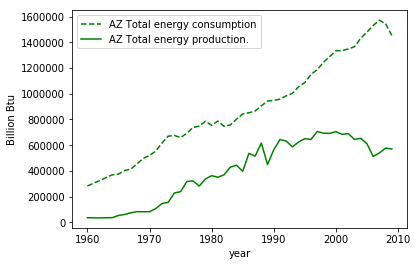

In [95]:
plt.plot(AZ_TETCB.Year, AZ_TETCB.Data, 'g--', label='AZ Total energy consumption')
plt.xlabel('year')
plt.ylabel('Billion Btu')
plt.plot(AZ_TEPRB.Year, AZ_TEPRB.Data, 'g', label='AZ Total energy production.')
plt.ylabel('Billion Btu')
plt.legend()

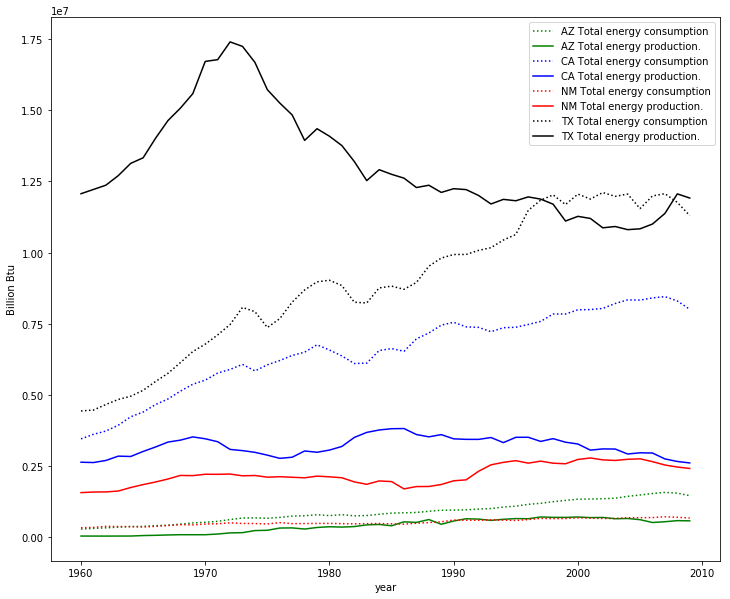

In [102]:
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
ax.set_xlabel('year')
ax.set_ylabel('Billion Btu')
colors = ['g', 'b', 'r', 'k']
for state, color in zip(states, colors):
    state_tetcb = TETCB[TETCB.StateCode == state]
    state_teprb = TEPRB[TEPRB.StateCode == state]
    ax.plot(state_tetcb.Year, state_tetcb.Data, color + ':', label='{} Total energy consumption'.format(state))
    ax.plot(state_teprb.Year, state_teprb.Data, color, label='{} Total energy production.'.format(state))

ax.legend()
plt.show()

In [135]:
data[['MSN', 'Description']][data.Description.str.contains('total consumption', case=False)].drop_duplicates().values

array([['ARTCB', 'Asphalt and road oil total consumption.'],
       ['ARTCP', 'Asphalt and road oil total consumption.'],
       ['AVTCB', 'Aviation gasoline total consumption.'],
       ['AVTCP', 'Aviation gasoline total consumption.'],
       ['BMTCB', 'Biomass total consumption'],
       ['CLTCB', 'Coal total consumption.'],
       ['CLTCP', 'Coal total consumption.'],
       ['DFTCB', 'Distillate fuel oil total consumption.'],
       ['DFTCP', 'Distillate fuel oil total consumption.'],
       ['EMTCB', 'Fuel ethanol, excluding denaturant, total consumption.'],
       ['ENTCP', 'Fuel ethanol, including denaturant, total consumption.'],
       ['ESTCB', 'Electricity total consumption (i.e., sold).'],
       ['ESTCP', 'Electricity total consumption (i.e., sold).'],
       ['FFTCB', 'Fossil fuelS, total consumption.'],
       ['GETCB', 'Geothermal energy total consumption.'],
       ['JFTCB', 'Jet fuel total consumption.'],
       ['JFTCP', 'Jet fuel total consumption.'],
       ['JKTC

In [134]:
data[['MSN', 'Description']][data.Description.str.contains('nuclear', case=False)].drop_duplicates().values

array([['NUEGB',
        'Electricity produced from nuclear power by the electric power sector.'],
       ['NUEGD', 'Nuclear fuel price in the electric power sector.'],
       ['NUEGP',
        'Electricity produced from nuclear power by the electric power sector.'],
       ['NUEGV', 'Nuclear fuel expenditures in the electric power sector.'],
       ['NUETB', 'Electricity produced from nuclear power.'],
       ['NUETD', 'Nuclear fuel average price, all sectors.'],
       ['NUETP', 'Electricity produced from nuclear power.'],
       ['NUETV', 'Nuclear fuel total expenditures.']], dtype=object)

In [160]:
REPRB = data[data.MSN == 'REPRB'] # Renewable energy production.
RETCB = data[data.MSN == 'RETCB'] # Renewable energy total consumption.
NUETB = data[data.MSN == 'NUETB'] # Electricity produced from nuclear power.

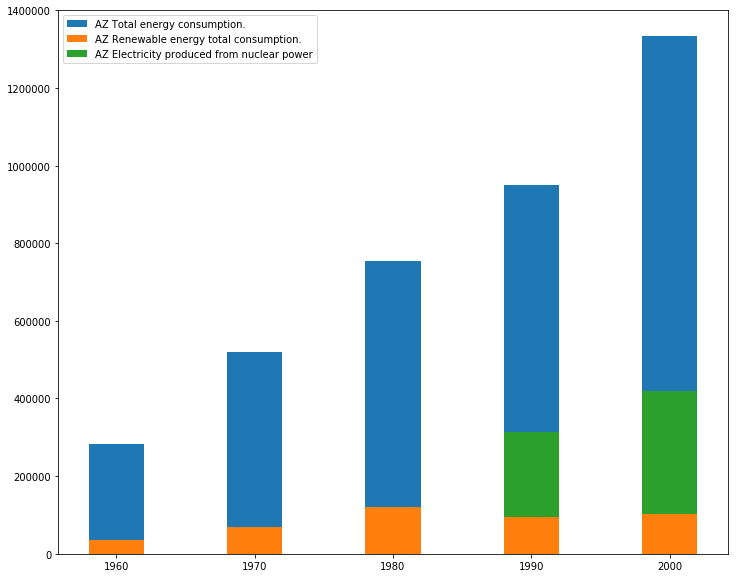

In [720]:
AZ_RETCB = RETCB[(RETCB.StateCode == 'AZ') & (RETCB.Year % 10 == 0)]
AZ_NUETB = NUETB[(NUETB.StateCode == 'AZ') & (NUETB.Year % 10 == 0)]
AZ_TETCB = AZ_TETCB[AZ_TETCB.Year % 10 == 0]
width = 4
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111)
ax.bar(AZ_TETCB.Year, AZ_TETCB.Data, width=width, label='AZ Total energy consumption.')
ax.bar(AZ_RETCB.Year, AZ_RETCB.Data, width=width, label='AZ Renewable energy total consumption.')
ax.bar(AZ_NUETB.Year, AZ_NUETB.Data, bottom=AZ_RETCB.Data, width=width, label='AZ Electricity produced from nuclear power')
ax.legend()

In [193]:
year = list(range(data.Year.min(), data.Year.max(), 10)) + [2009]
REPRB = data[(data.MSN == 'REPRB') & (data.Year.isin(year))] # Renewable energy production.
RETCB = data[(data.MSN == 'RETCB') & (data.Year.isin(year))] # Renewable energy total consumption.
NUETB = data[(data.MSN == 'NUETB') & (data.Year.isin(year))] # Electricity produced from nuclear power.
TEPRB = data[(data.MSN == 'TEPRB') & (data.Year.isin(year))] # Total energy production.
TETCB = data[(data.MSN == 'TETCB') & (data.Year.isin(year))] # Total energy consumption.

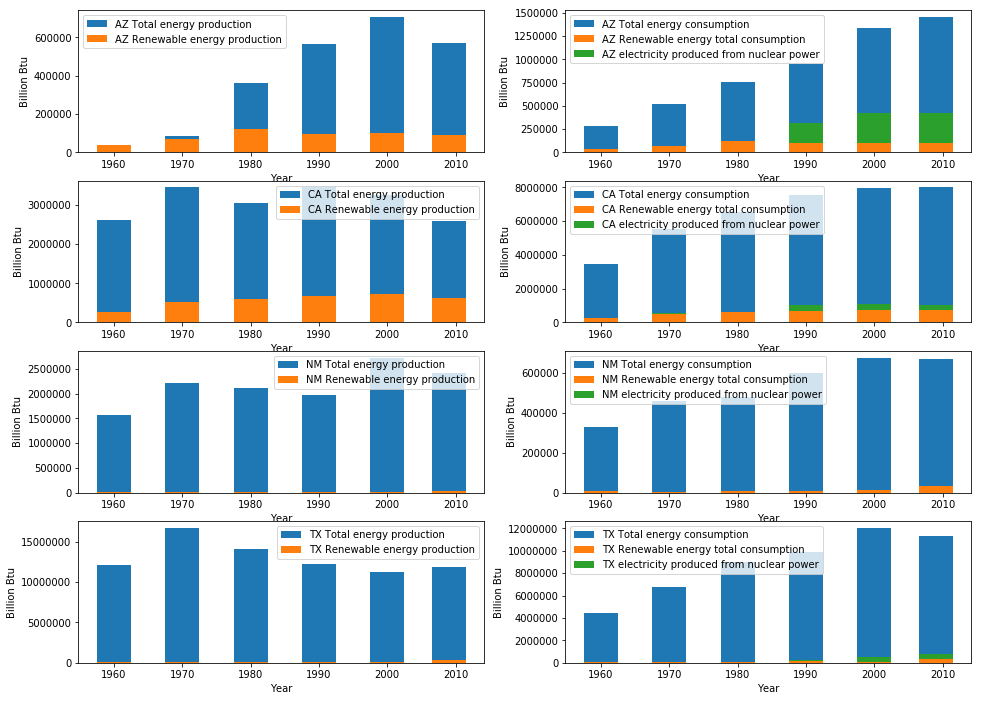

In [254]:
width = 5
fig = plt.figure(figsize=(16, 12))
# plotting production
for step, state in enumerate(states):
    ax = fig.add_subplot(4, 2, step * 2 + 1)
    state_reprb = REPRB[REPRB.StateCode == state] # Renewable energy production.
 #   state_nuetb = NUETB[NUETB.StateCode == state] # Electricity produced from nuclear power.
    state_teprb = TEPRB[TEPRB.StateCode == state] # Total energy production.
    ax.bar(state_teprb.Year, state_teprb.Data, width=width, label='{} Total energy production'.format(state))
    ax.bar(state_reprb.Year, state_reprb.Data, width=width, label='{} Renewable energy production'.format(state))
 #   ax.bar(state_nuetb.Year, state_nuetb.Data, bottom=state_reprb.Data, width=width, 
 #          label='{} Electricity produced from nuclear power'.format(state))
    ax.legend()
    ax.set_xlabel('Year')
    ax.set_ylabel('Billion Btu')
    ax.ticklabel_format(style='plain')
    reprb_ratio = state_reprb.Data.values / state_teprb.Data.values
    nuetb_ratio = state_nuetb.Data.values / state_teprb.Data.values
        
# plotting consumption
for step, state in enumerate(states):
    ax = fig.add_subplot(4, 2, step * 2 + 2)
    state_tetcb = TETCB[TETCB.StateCode == state]
    state_nuetb = NUETB[NUETB.StateCode == state]
    state_retcb = RETCB[RETCB.StateCode == state]
    ax.bar(state_tetcb.Year, state_tetcb.Data, width=width, label='{} Total energy consumption'.format(state))
    ax.bar(state_retcb.Year, state_retcb.Data, width=width, label='{} Renewable energy total consumption'.format(state))
    ax.bar(state_nuetb.Year, state_nuetb.Data, bottom=state_retcb.Data, width=width, 
        label='{} electricity produced from nuclear power'.format(state))
    ax.legend()
    ax.set_xlabel('Year')
    ax.set_ylabel('Billion Btu')
    ax.ticklabel_format(style='plain')

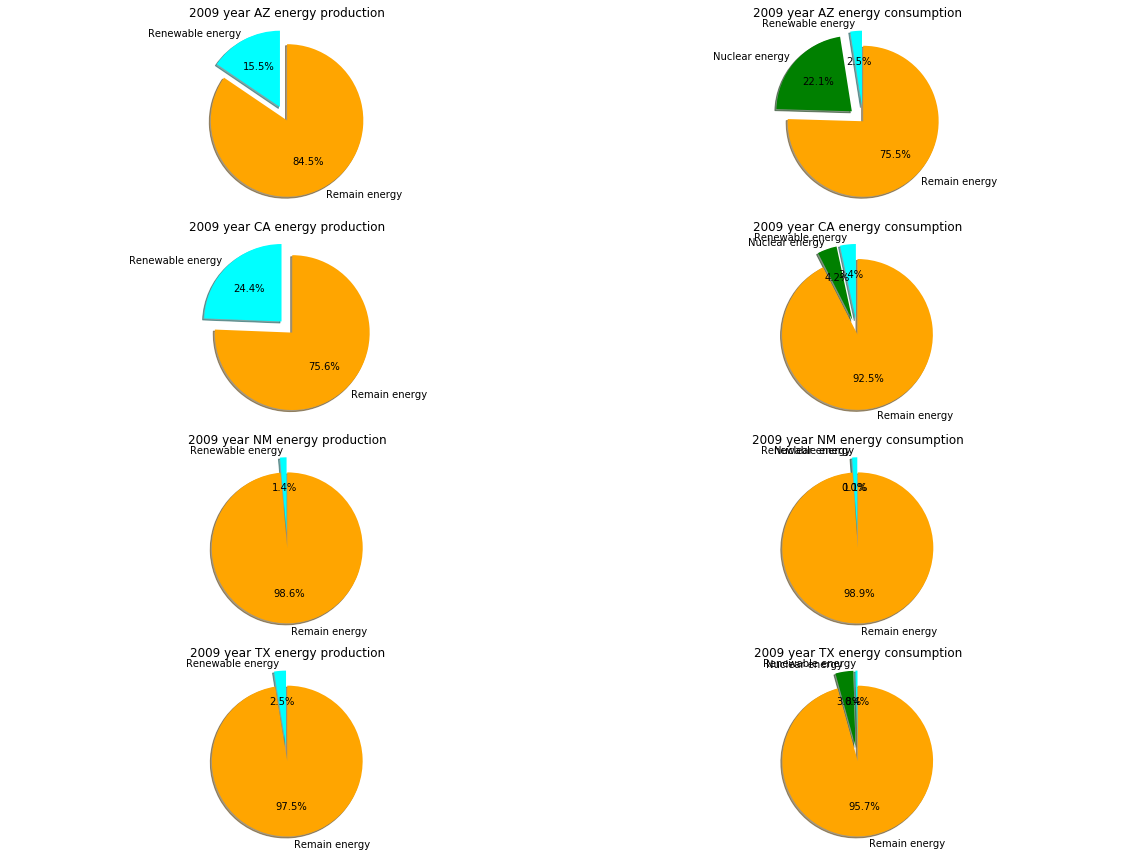

In [520]:
fig = plt.figure(figsize=(16, 12))
# plotting production
for step, state in enumerate(states):
    ax = fig.add_subplot(4, 2, step * 2 + 1)
    state_reprb = REPRB[(REPRB.StateCode == state) & (REPRB.Year == 2009)] # Renewable energy production.
    state_teprb = TEPRB[(TEPRB.StateCode == state) & (TEPRB.Year == 2009)] # Total energy production.
    labels = ['Renewable energy', 'Remain energy']
    size = [state_reprb.Data.values[0] / state_teprb.Data.values[0] * 100]
    size.append(100 - size[0])
    explode = (0.2, 0)
    ax.pie(size, labels=labels, explode=explode, autopct='%1.1f%%',
           shadow=True, startangle=90, colors=['cyan', 'orange'])
    ax.axis('equal')
    ax.set_title('2009 year {} energy production'.format(state))
    

# plotting consumption
for step, state in enumerate(states):
    ax = fig.add_subplot(4, 2, step * 2 + 2)
    state_tetcb = TETCB[(TETCB.StateCode == state) & (TETCB.Year == 2009)]
    state_nuetb = NUETB[(NUETB.StateCode == state) & (NUETB.Year == 2009)]
   
    state_retcb = RETCB[RETCB.StateCode == state]
    labels = ['Renewable energy', 'Nuclear energy', 'Remain energy']
    size = [state_retcb.Data.values[0] / state_tetcb.Data.values[0] * 100,
           state_nuetb.Data.values[0] / state_tetcb.Data.values[0] * 100]
    size.append(100 - size[0] - size[1])
    explode = (0.2, 0.2 , 0)
    ax.pie(size, labels=labels, explode=explode, autopct='%1.1f%%',
           shadow=True, startangle=90, colors=['cyan', 'green', 'orange'])
    ax.axis('equal')
    ax.set_title('2009 year {} energy consumption'.format(state))
    fig.tight_layout()

In [264]:
TEPRB[(TEPRB.StateCode == 'AZ')]

,MSN,StateCode,Year,Data,Description,Unit
94052,TEPRB,AZ,1960,36737.34015,Total energy production.,Billion Btu
94062,TEPRB,AZ,1970,83347.03073,Total energy production.,Billion Btu
94072,TEPRB,AZ,1980,363380.43780,Total energy production.,Billion Btu
94082,TEPRB,AZ,1990,564694.33030,Total energy production.,Billion Btu
94092,TEPRB,AZ,2000,705499.63130,Total energy production.,Billion Btu
94101,TEPRB,AZ,2009,570994.04590,Total energy production.,Billion Btu


In [229]:
state_reprb.Data.values / state_reprb.Data.values

array([ 1.,  1.,  1.,  1.,  1.,  1.])

In [874]:
state_reprb.iloc[0].Description

'Renewable energy production.'

In [875]:
fig.savefig?

In [929]:
def draw_line(states, data, left=[], right=[]):
    fig = plt.figure(figsize=(25, 20))
    # plotting ratio(left)
    if len(right) == 0:
        right = left

    ret = []
    plt.rc('xtick',labelsize=12)
    plt.rc('ytick',labelsize=12)
    for step, state in enumerate(states):
        ax = fig.add_subplot(4, 2, step * 2 + 1)
        state_data = data[data.StateCode == state]
        state_tetcb = []
        cd = []

        for consumption in left:
            cd.append(state_data[state_data.MSN == consumption])
        for year in range(1960, 2010):
            total = 0
            for consumption_data in cd:
                total += consumption_data[consumption_data.Year == year].iloc[0].Data
            state_tetcb.append(
                {'Year': year,
                 'Data': total
                 })

        state_tetcb = pd.DataFrame(state_tetcb)

        for consumption, consumption_data in zip(left, cd):
            consumption_tetcb = consumption_data.merge(state_tetcb, how='outer', on='Year')
            consumption_tetcb['ratio'] = consumption_tetcb['Data_x'] / consumption_tetcb['Data_y'] * 100
            ret.append(consumption_tetcb)
            ax.plot(consumption_tetcb.Year, consumption_tetcb.ratio,
                    label=consumption)

            # ax.plot(production_data.Year, production_data.Data / state_teprb.Data * 100,
            #         label='{} {}'.format(state, production))
        ax.set_title(state, fontsize=12)
        ax.set_xlabel('Year', fontsize=12)
        try:
            ax.set_ylabel('%', fontsize=12)
        except UnboundLocalError:
            pass
        leg = ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode='expand', ncol=len(left))
        leg.get_frame().set_alpha(0.0)

    # plotting consumption(right)
    for step, state in enumerate(states):
        ax = fig.add_subplot(4, 2, step * 2 + 2)
        state_data = data[data.StateCode == state]
        for consumption in right:
            consumption_data = state_data[state_data.MSN == consumption]
            ax.plot(consumption_data.Year, consumption_data.Data,
                    label=consumption)
        ax.set_title(state, fontsize=12)
        ax.set_xlabel('Year', fontsize=12)
        try:
            ax.set_ylabel(consumption_data.iloc[0].Unit, fontsize=12)
        except UnboundLocalError:
            pass
        leg = ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode='expand', ncol=len(right))
        leg.get_frame().set_alpha(0.0)

    fig.tight_layout()
    fig.savefig('plot.svg')
    return ret


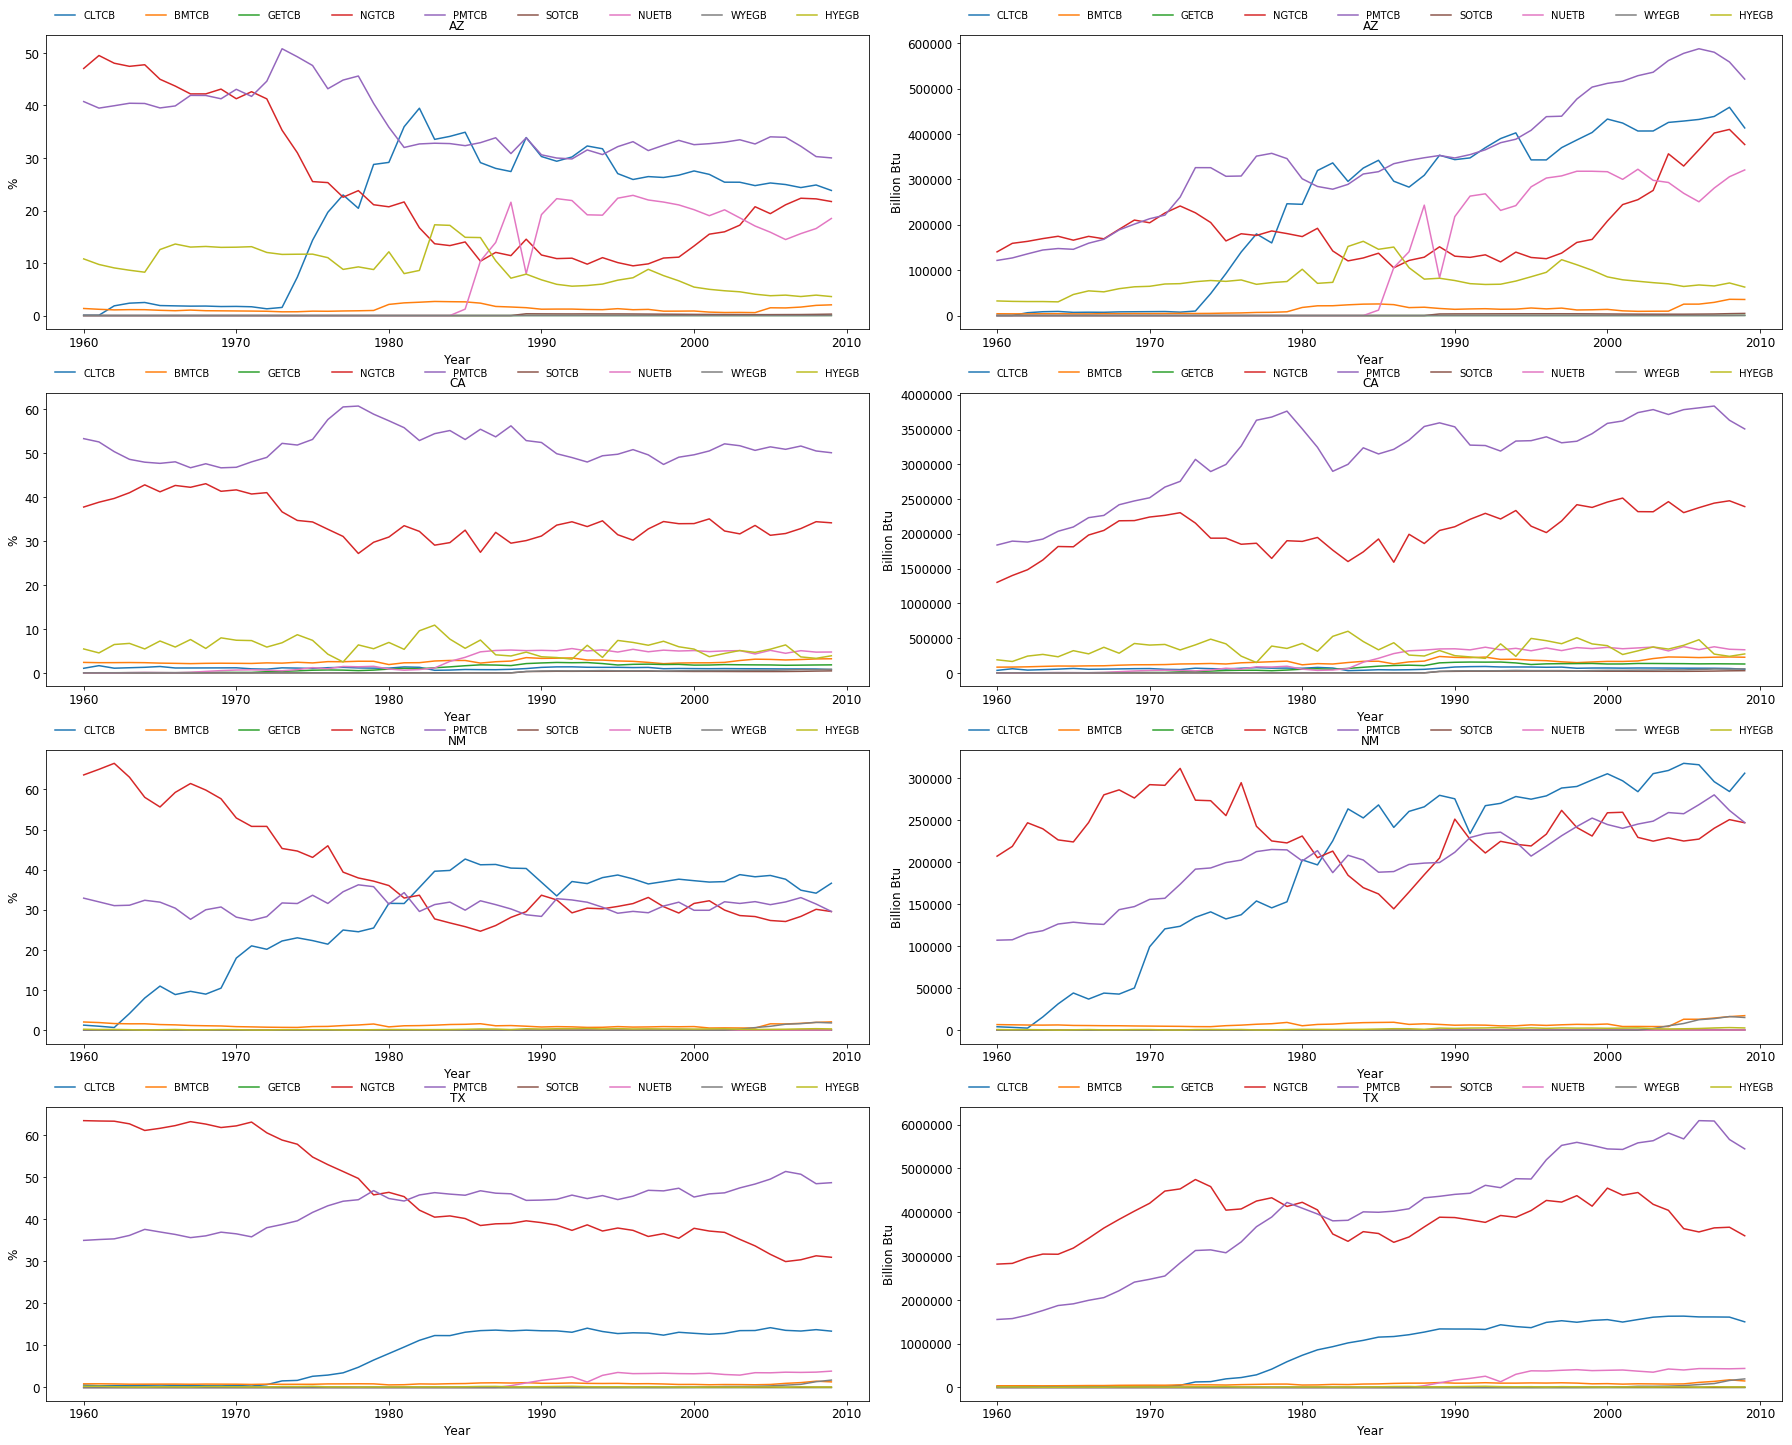

In [930]:
ratio = draw_line(states, data, left=['CLTCB', 'BMTCB', 'GETCB', 'NGTCB', 'PMTCB', 'SOTCB', 'NUETB', 'WYEGB', 'HYEGB'])

In [636]:
def showRatio(ratio, years=list(range(1960, 2010, 10)) + [2009], filename='state_energy_by_year_ratio.csv'):
    revision = []
    for year in years:
        for r in ratio:
            state_by_year = r[r.Year == year]
            for idx, st in state_by_year.iterrows():
                revision.append(OrderedDict({
                    'Year': year,
                    'StateCode': st.StateCode,
                    'MSN': st.MSN,
                    'ratio': st.ratio,
                    'Description': st.Description
                    }))
    revision = pd.DataFrame(revision)
    revision.to_csv(filename)

In [502]:
showRatio(ratio, years=range(1960, 2010))

In [526]:
AZ_RNT = data[(data.MSN.isin(['RETCB', 'NUETB', 'TETCB'])) & (data.StateCode == 'AZ')]

Text(0.5,1,'233')

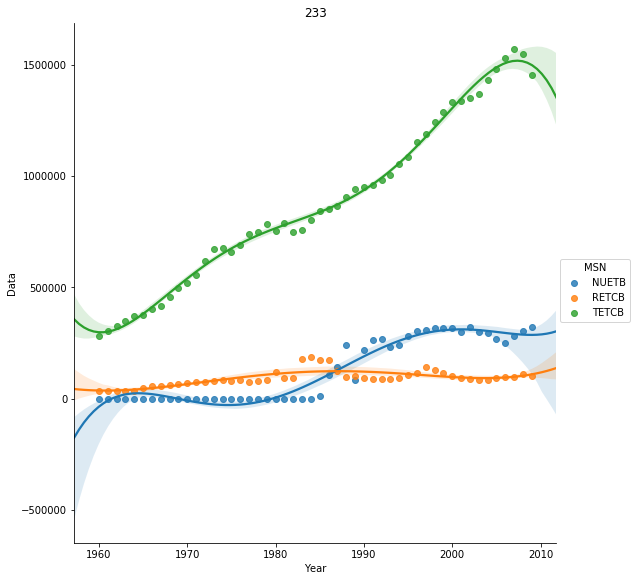

In [552]:
sns.lmplot(data=AZ_RNT, x='Year', y='Data', hue='MSN', size=8,
          order=5)
plt.title('233')

In [924]:
def regression(states, data, features=['RETCB', 'NUETB', 'TETCB'], order=1, predict_year=[2025, 2050], filename='预测结果.csv'):
    state_data = data[(data.MSN.isin(features))].reindex(columns=['Year', 'StateCode', 'MSN', 'Data', 'Unit'])
    state_data.to_csv('state_data_linear_regression.csv')
    # sns.lmplot(data=state_data, x='Year', y='Data', hue='MSN', size=8,
    #            order=order)
    fig = plt.figure(figsize=(25, 20))
    result = []
    for step, state in enumerate(states):
        ax = fig.add_subplot(2, 2, step + 1)
        ax.set_title(state)
        for feature in features:
            feature_data = state_data[(state_data.MSN == feature) & (state_data.StateCode == state)]
            assert len(feature_data == 50)
            if order == 1:
                slope, intercept, r_value, p_value, std_err = \
                    scipy.stats.linregress(feature_data.Year, feature_data.Data)

                sns.regplot(x='Year', y='Data', data=feature_data, truncate=True, ax=ax, label=\
                    '{}: R^2={:.2f} y={:.2f}x+{:.2f}'.format(feature, r_value**2, slope, intercept))
                for year in predict_year:
                    result.append(OrderedDict({
                        'Year': year,
                        'StateCode': state,
                        'MSN': feature,
                        'Data': slope * year + intercept,
                        'Unit': state_data.iloc[0].Unit
                    }))
            else:
                p = np.polyfit(feature_data.Year, feature_data.Data, deg=order)
                label = '{}: R^2={:.2f} y='
                for x in range(order):
                    label += '{:.2f}x^' + str(order-x) + '+'
                label += '{:.2f}'
                f = np.poly1d(p)
                r2 = r2_score(f(feature_data.Year.values), feature_data.Data.values)

                sns.regplot(x='Year', y='Data', data=feature_data, truncate=True, ax=ax, order=order, label=\
                    label.format(feature, r2, *p))

                for year in predict_year:
                    result.append(OrderedDict({
                        'Year': year,
                        'StateCode': state,
                        'MSN': feature_data,
                        'Data': f(year),
                        'Unit': state_data.iloc[0].Unit
                    }))

        ax.set_ylabel(state_data.iloc[0].Unit)
        leg = ax.legend()
        leg.get_frame().set_alpha(0.0)

    result = pd.DataFrame(result)
    result.to_csv(filename)
    fig.tight_layout()

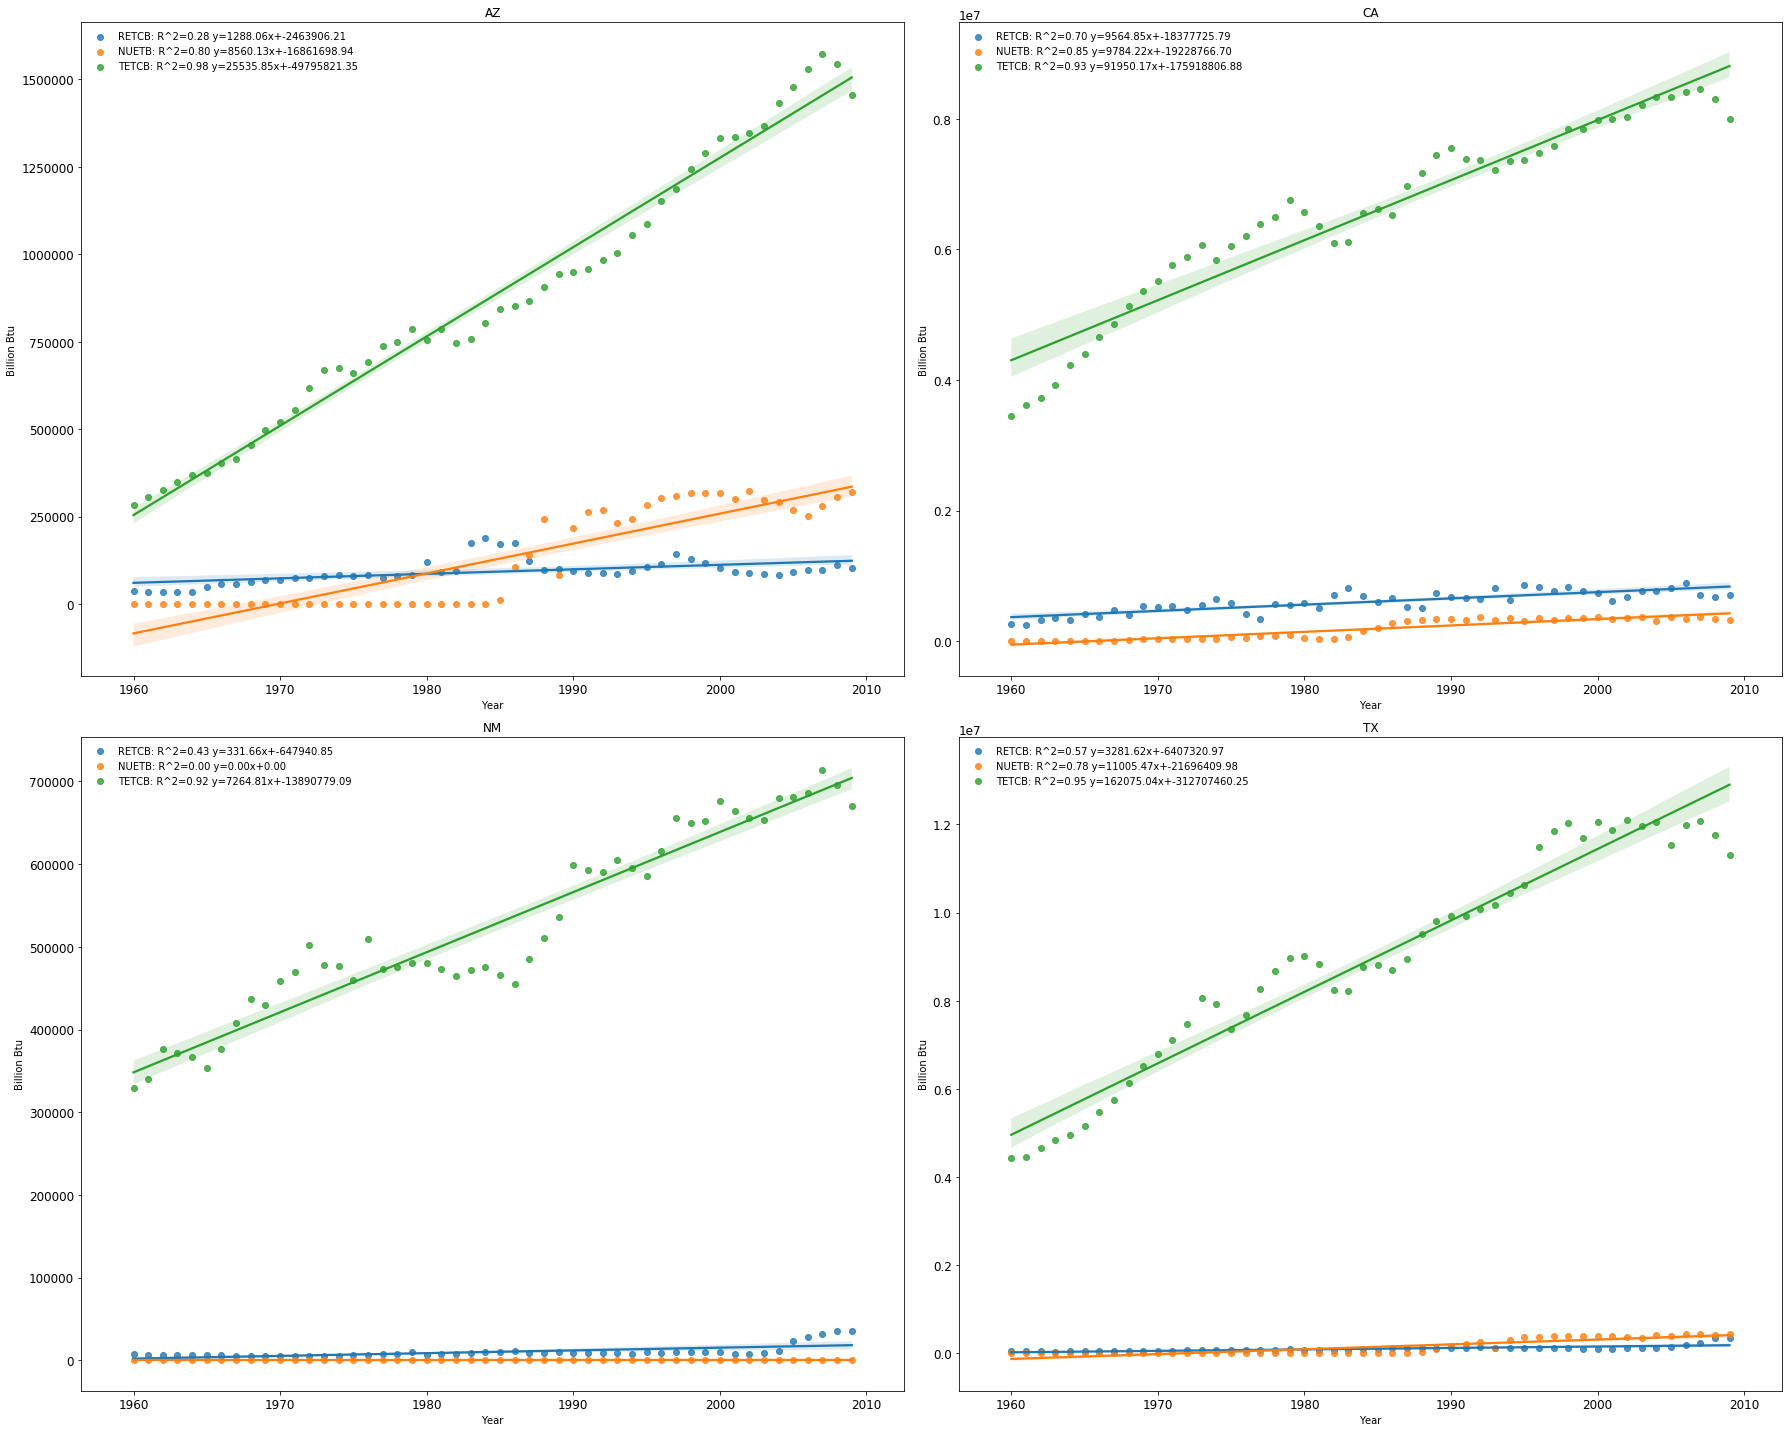

In [927]:
regression(states, data, order=1)

In [635]:
data[data.MSN.isin(['RETCB', 'NUETB', 'TETCB'])].reindex(columns=['Year', 'StateCode', 'MSN', 'Data']).head()

,Year,StateCode,MSN,Data
66892,1960,AZ,NUETB,0.0
66893,1961,AZ,NUETB,0.0
66894,1962,AZ,NUETB,0.0
66895,1963,AZ,NUETB,0.0
66896,1964,AZ,NUETB,0.0


In [628]:
AZ_CLPRB.Year.values

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009])

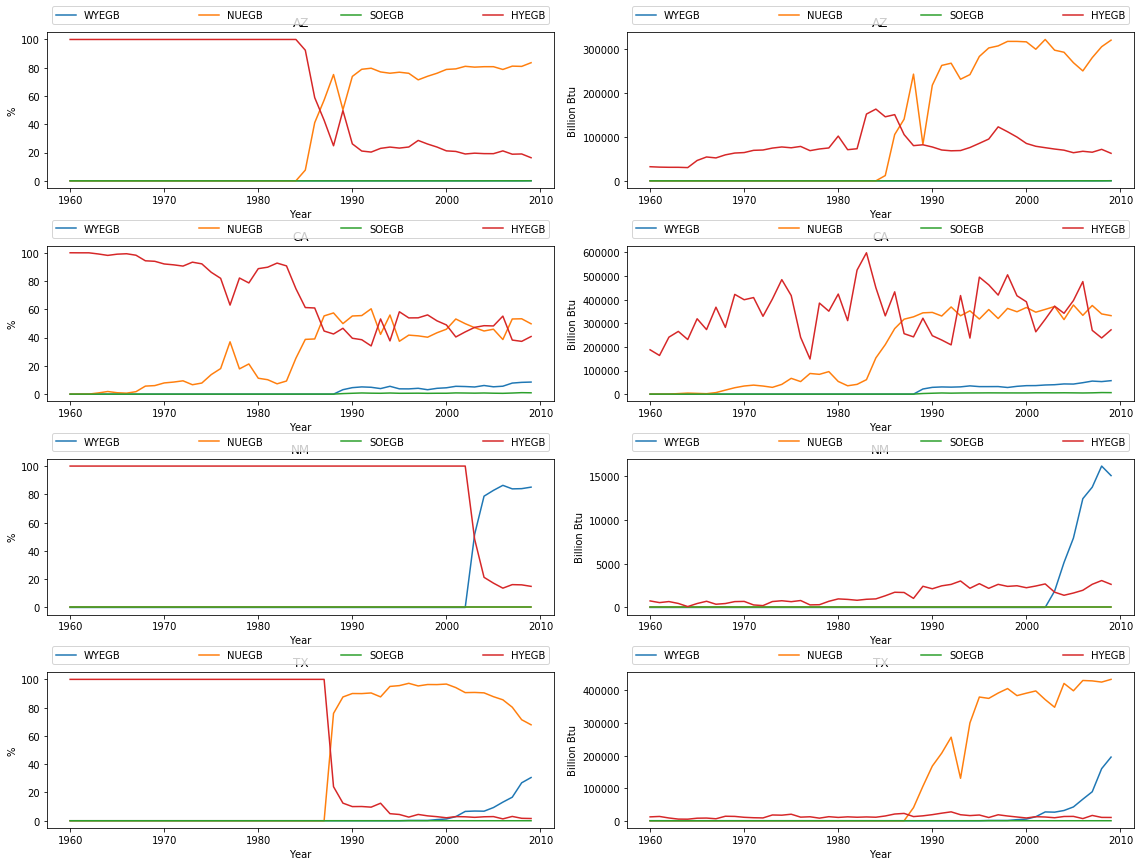

In [638]:
ratio = draw_line(states, data, left=['WYEGB', 'NUEGB', 'SOEGB', 'HYEGB'],
          right=['WYEGB', 'NUEGB', 'SOEGB', 'HYEGB'])

In [639]:
showRatio(ratio, filename='四个州风水核电太阳能比率.csv')

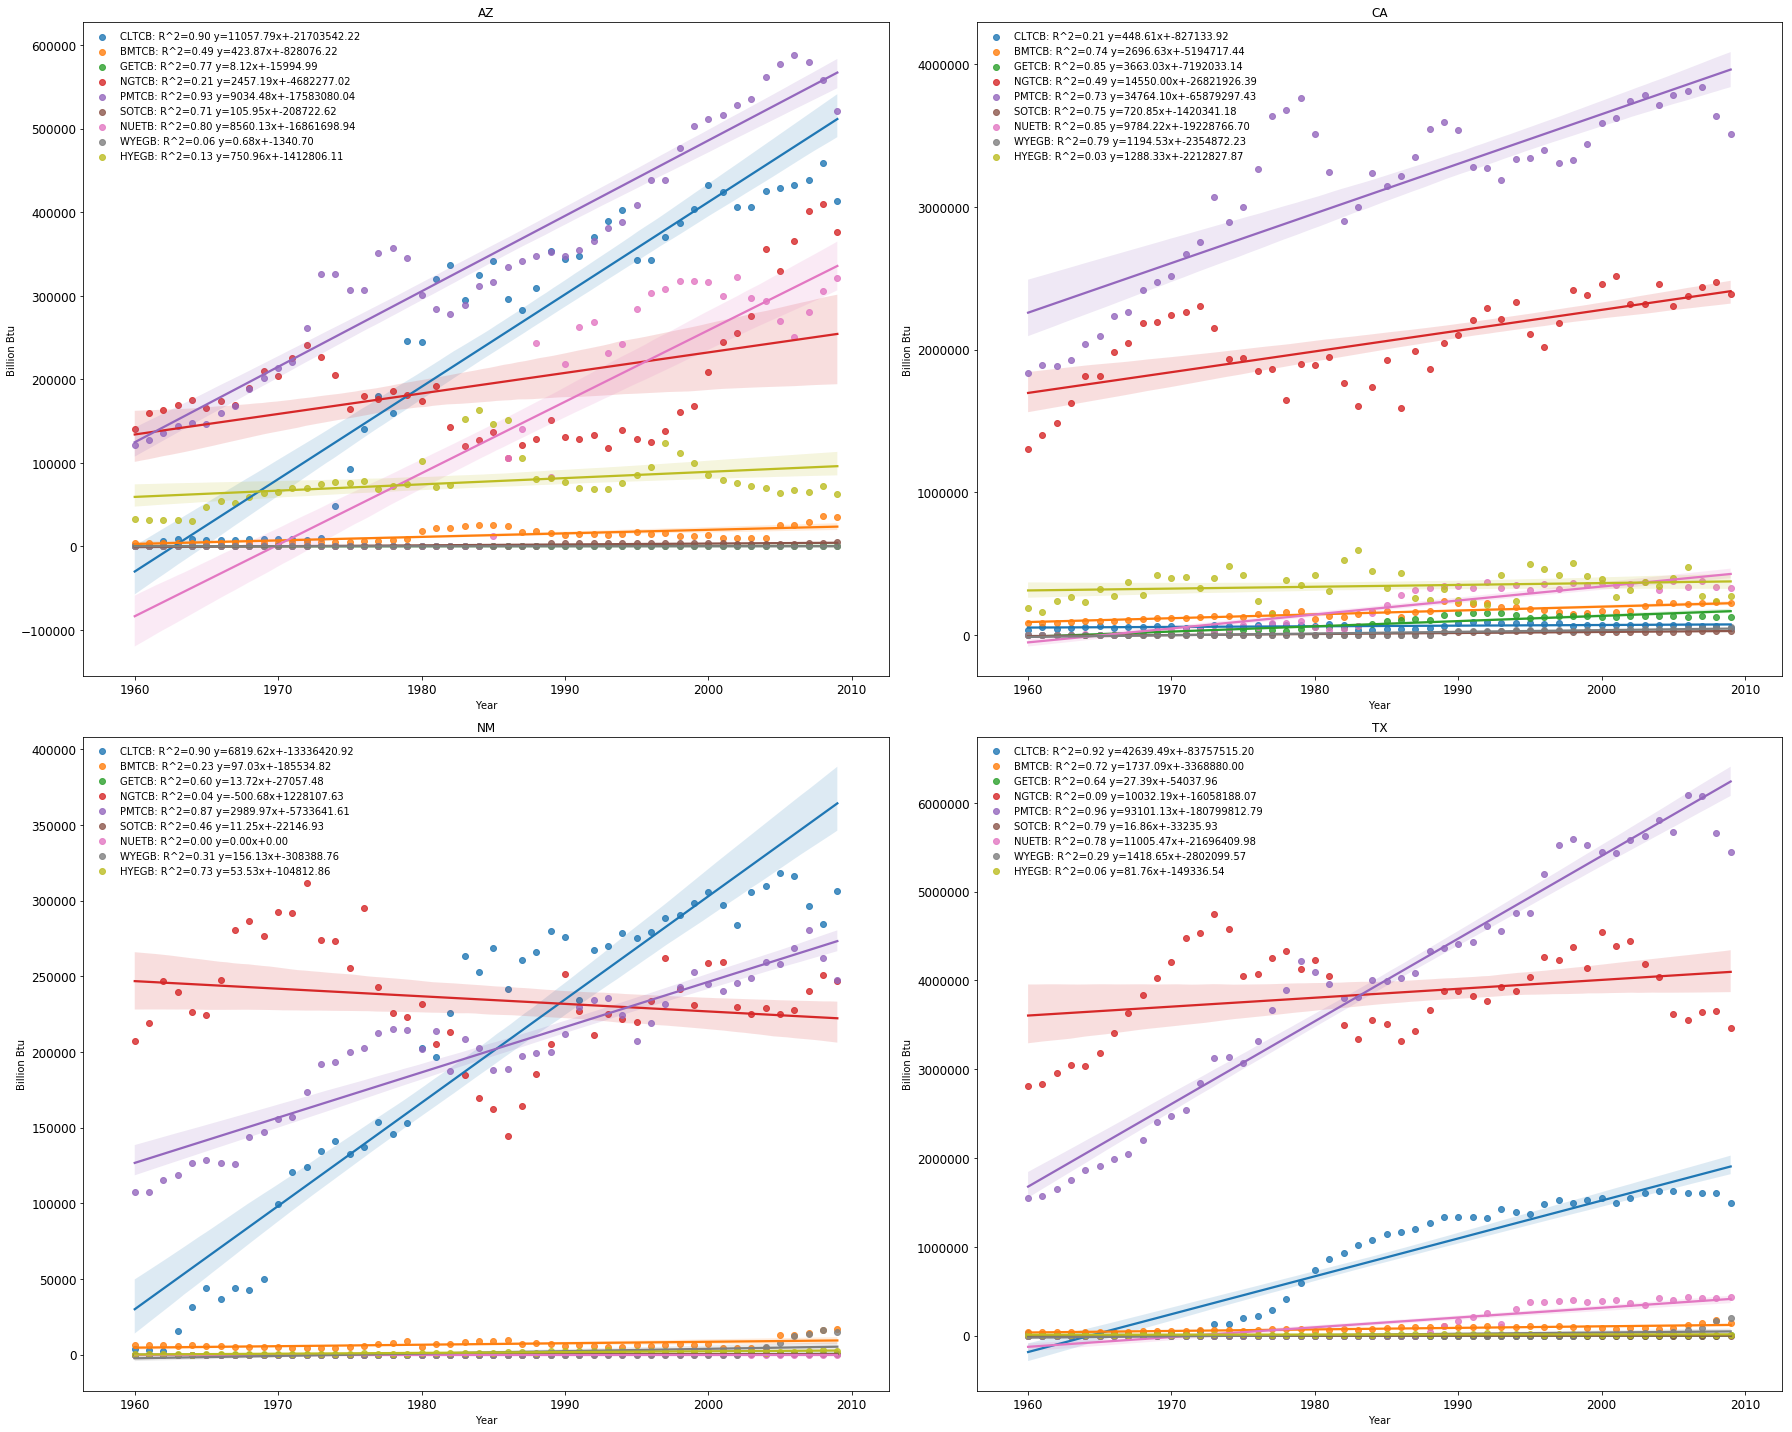

In [928]:
regression(states, data, order=1, features=['CLTCB', 'BMTCB', 'GETCB', 'NGTCB', 'PMTCB', 'SOTCB', 'NUETB', 'WYEGB', 'HYEGB'],
          filename='9个变量的预测结果.csv')

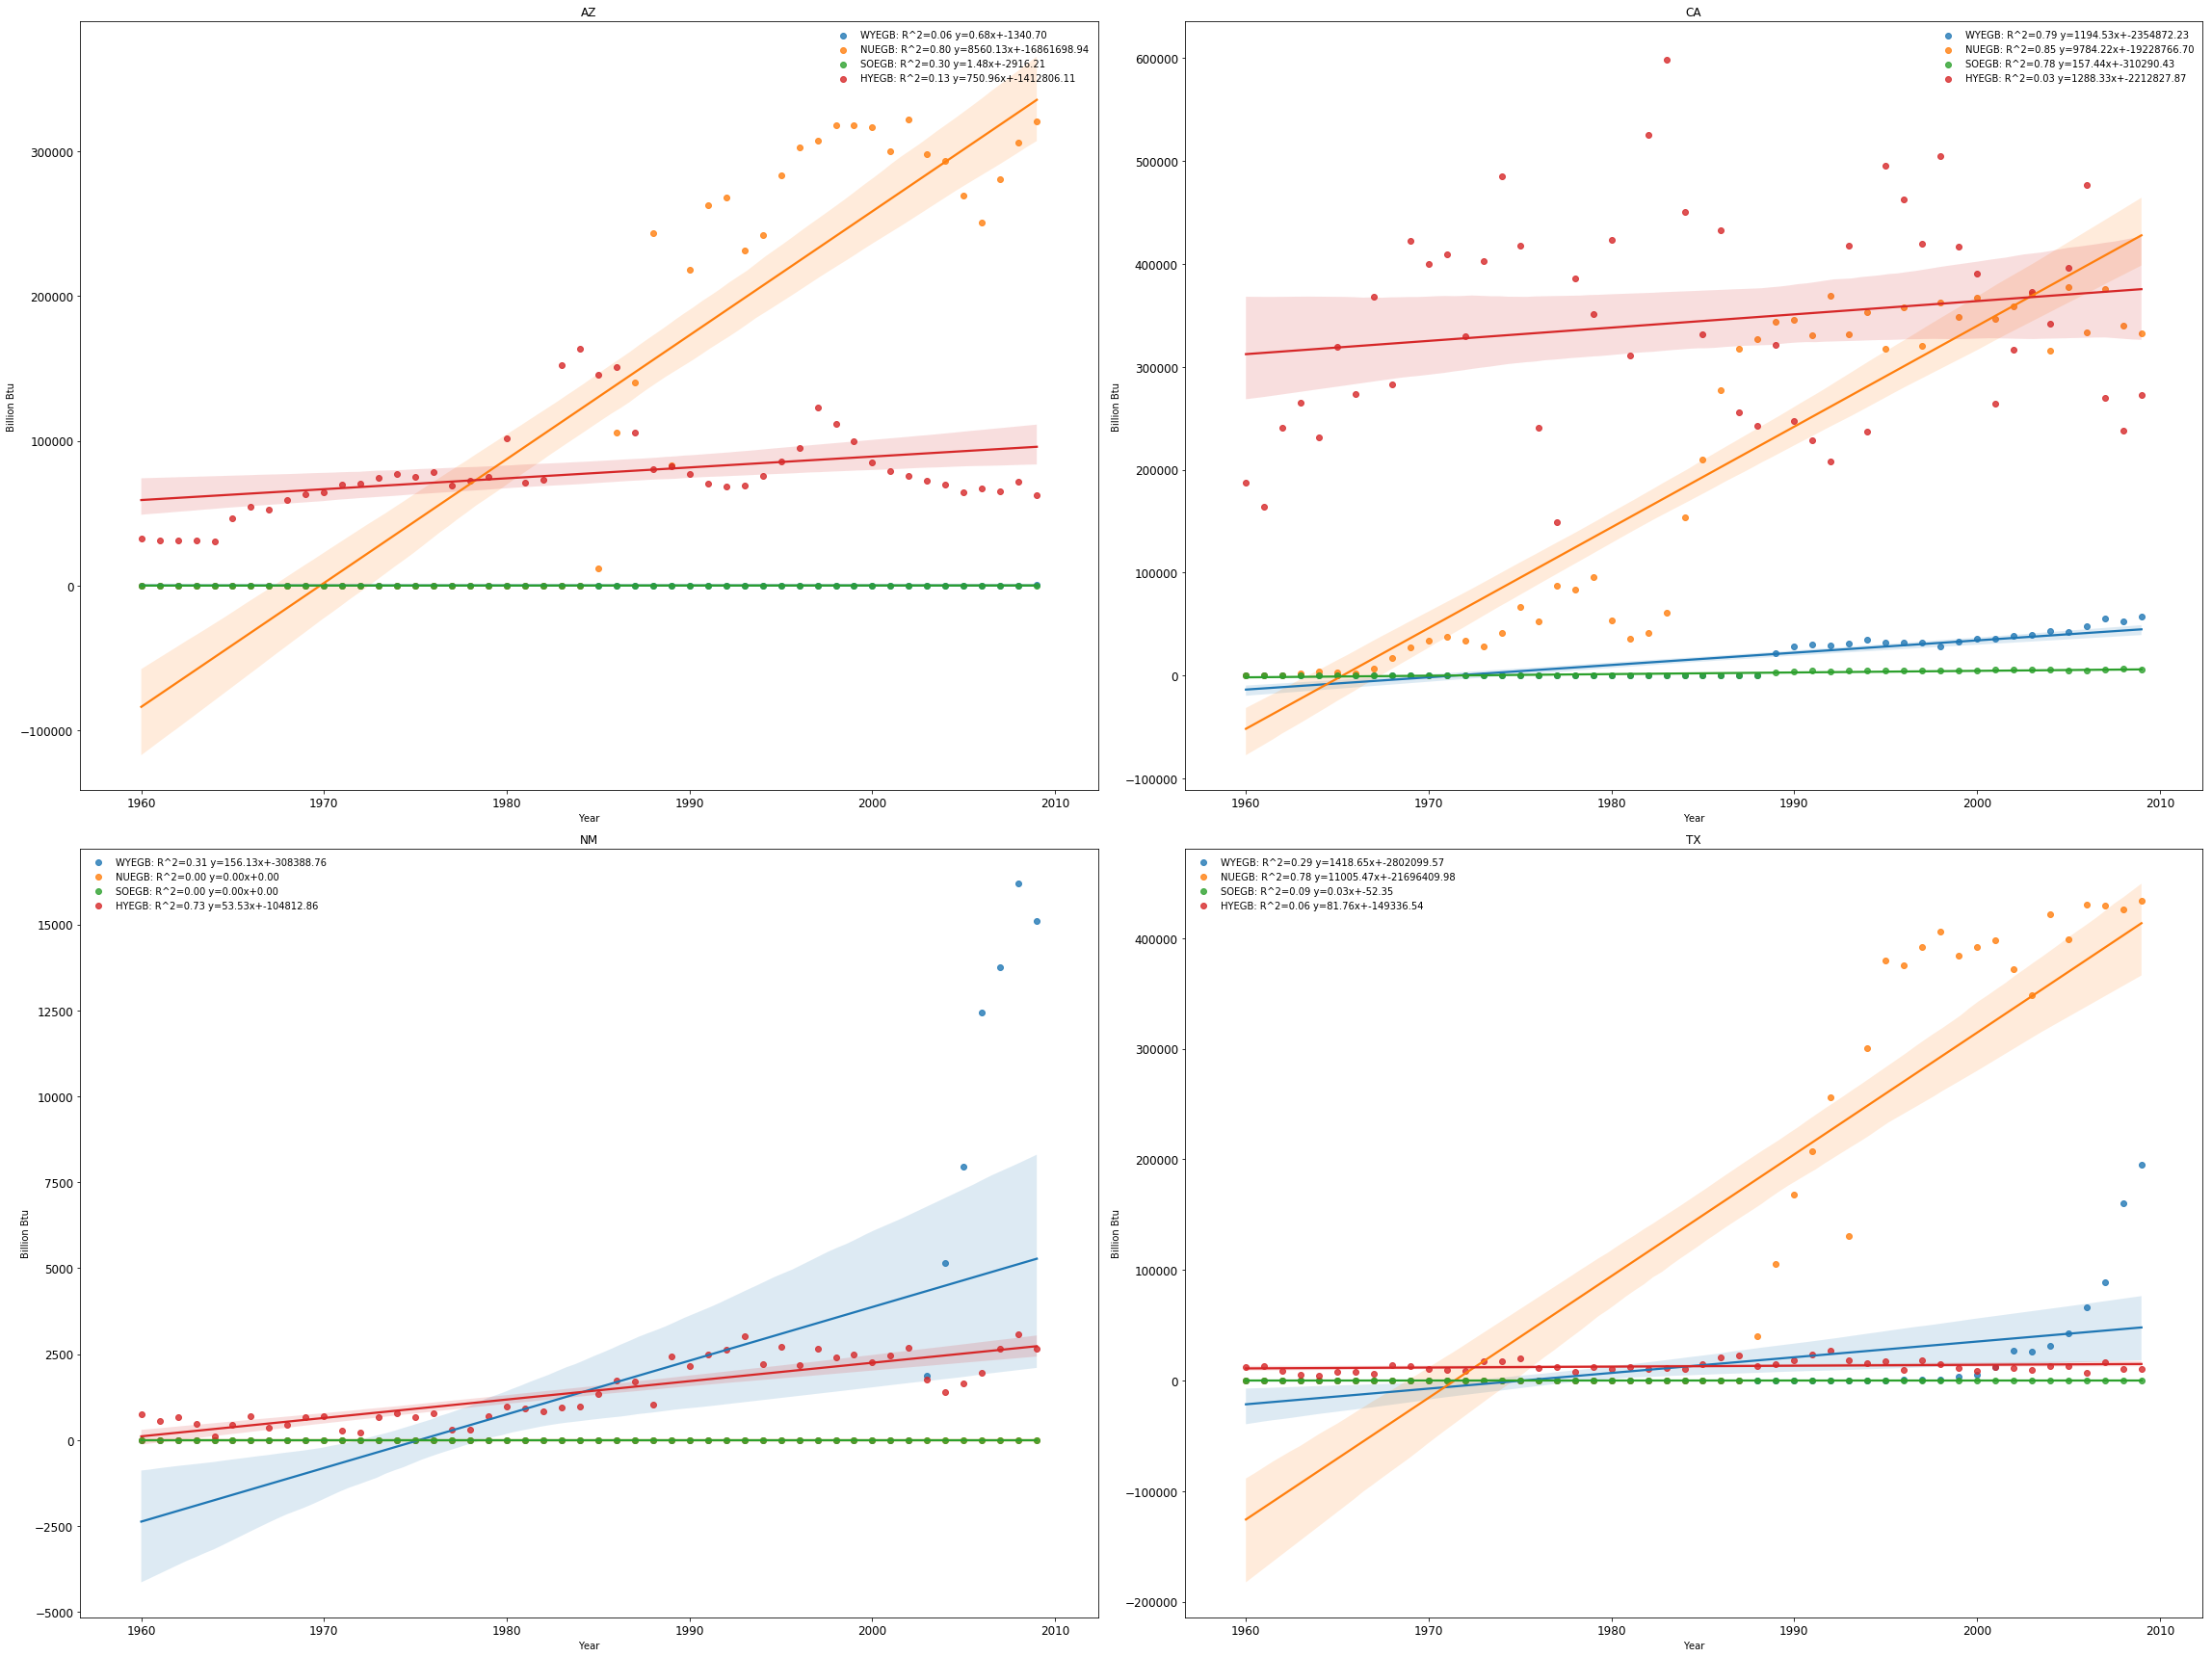

In [923]:
regression(states, data, order=1, features=['WYEGB', 'NUEGB', 'SOEGB', 'HYEGB'],
          filename='4个变量的预测结果.csv')

In [782]:
def output_data(data, year, msn, filename):
    def rate(s):
        total_value = s.Data.sum()
        s['rate'] = s.Data / total_value
        return s

    needed = data[(data.Year.isin(year)) & (data.MSN.isin(msn))].reindex(columns=[
        'Year', 'StateCode', 'MSN', 'Data', 'Unit'
    ])
    needed = needed.groupby(['Year', 'StateCode']).apply(rate)
    needed.to_csv(filename)

In [787]:
output_data(data, year=list(range(1960, 2010, 5)) + [2009],
            msn=['CLTCB', 'BMTCB', 'GETCB', 'NGTCB', 'PMTCB', 'SOTCB', 'NUETB', 'WYEGB', 'HYEGB'],
            filename='间隔五年的九个变量.csv')

In [788]:
data.StateCode.unique()

array(['AZ', 'CA', 'NM', 'TX'], dtype=object)

为了对今后在2025、2050年各个州未发生政策改变的情况下对其能源概况进行预测，我们基于历史数据，对历史数据的各种能源分别进行线性回归，从而达到预测要求。

下面我们对符号进行定义，设$X$值为自变量，在本题中，$X$为年份；设$Y$为因变量，即需要预测的能源种类的值，$a$和$b$为相关系数。线性回归表达式为：
$$Y = aX+b$$

为求得a, b，我们需要求解

$$\min Q(a, b) = \sum_{i=1}^n(Y_i - (aX_i+b))^2$$

化简得到：
$$Q(a, b) = n\overline{Y^2} - 2an\overline{XY} - 2bn\overline Y + a^2n\overline{X^2} + 2abn\overline X + nb^2$$

为求得$Q(a, b)$的最小值，分别对$Q$求$a$和$b$的偏导数，令其为0。
$$
\frac{\partial Q}{\partial a} = -2n\overline{XY} + 2an\overline{X^2} + 2bn\overline X = 0\\
\frac{\partial Q}{\partial b} = -2n\overline Y  + 2an\overline X + 2nb = 0
$$

从而得出：
$$
a = \dfrac{\overline X \overline Y - \overline{XY}}{(\overline X)^2 - \overline{X^2}} \\
b = \overline Y - a\overline X
$$

那么如何评价结果的好坏呢？我们可以通过$R^2$(coefficient of determination)来判断回归方程的拟合程度。

The total sum of squares (proportional to the variance of the data):
$$SST = \sum_{i=1}^n(Y_i - \overline Y)^2$$

The regression sum of squares, also called the explained sum of squares
$$SSR = \sum_{i=1}^n (\hat {Y_i} - \overline Y)^2$$

The sum of squares of residuals, also called the residual sum of squares:
$$SSE = \sum_{i=1}^n (\hat {Y_i} - Y_i)^2 = \sum_{i=1}^n e_i^2$$

The most general definition of the coefficient of determination is

$$R^2 = 1 - \frac{SSE}{SST}$$

In [846]:
print('间隔5年能源之和平均值')
data5 = data[data.Year.isin(list(range(1960, 2010, 5)) + [2009])]
for state in states:
    state_tetcb = data5[(data5.MSN == 'TETCB') & (data5.StateCode == state)]
    print(state, state_tetcb.Data.mean())

间隔5年能源之和平均值
AZ 885293.0119272728
CA 6532299.384636364
NM 523671.55868181825
TX 8821908.201000001


In [859]:
print('间隔5年能源之和增长值平均值')
data5 = data[data.Year.isin(list(range(1960, 2010, 5)) + [2009])]
for state in states:
    state_tetcb = data5[(data5.MSN == 'TETCB') & (data5.StateCode == state)]
    print(state, state_tetcb.Data.diff().mean())

间隔5年能源之和增长值平均值
AZ 117118.47445999998
CA 455383.9876
NM 34107.42305
TX 686529.7262


In [862]:
print('间隔5年清洁能源平均值')
for state in states:
    state_nuetb = data5[(data5.MSN.isin(['NUETB'])) & (data5.StateCode == state)]
    state_retcb = data5[(data5.MSN.isin(['RETCB'])) & (data5.StateCode == state)]
    state_clear = pd.merge(state_nuetb, state_retcb, on='Year', how='outer')
    state_clear['total'] = state_clear['Data_x'] + state_clear['Data_y']
    print(state, state_clear.total.mean())

间隔5年清洁能源平均值
AZ 222535.79855545453
CA 807764.6593945455
NM 11831.248576363636
TX 273548.46636454546


In [864]:
print('间隔5年清洁能源增长值平均值')
for state in states:
    state_nuetb = data5[(data5.MSN.isin(['NUETB'])) & (data5.StateCode == state)]
    state_retcb = data5[(data5.MSN.isin(['RETCB'])) & (data5.StateCode == state)]
    state_clear = pd.merge(state_nuetb, state_retcb, on='Year', how='outer')
    state_clear['total'] = state_clear['Data_x'] + state_clear['Data_y']
    print(state, state_clear.total.diff().mean())

间隔5年清洁能源增长值平均值
AZ 38803.479352999995
CA 77479.224912
NM 2826.2327880000003
TX 74054.491263


In [889]:
print('间隔5年清洁能源增速平均值')
for state in states:
    state_nuetb = data5[(data5.MSN.isin(['NUETB'])) & (data5.StateCode == state)]
    state_retcb = data5[(data5.MSN.isin(['RETCB'])) & (data5.StateCode == state)]
    state_clear = pd.merge(state_nuetb, state_retcb, on='Year', how='outer')
    state_clear['total'] = state_clear['Data_x'] + state_clear['Data_y']

    print(state, (state_clear.total.diff().shift(-1) / state_clear.total).mean())
    #print(state, (state_clear.total.diff().shift(-1) / state_clear.total).iloc[9])

间隔5年清洁能源增速平均值
AZ 0.3008383391031538
CA 0.1601948662831903
NM 0.23018410019742097
TX 0.4061825631417168


In [835]:
def prop(data, year, up, down):
    states = data.StateCode.unique()
    for state in states:
        tup, tdown = 0, 0
        for u in up:
            tup += data[(data.Year == year) & (data.StateCode == state) & (data.MSN == u)].iloc[0].Data
        for d in down:
            tdown += data[(data.Year == year) & (data.StateCode == state) & (data.MSN == d)].iloc[0].Data
        print(state, tup / tdown)

In [836]:
print('RE/TE')
prop(data, 2009, ['WYEGB', 'NUEGB', 'SOEGB', 'HYEGB'], ['ESTCB'])

RE/TE
AZ 1.53213103598
CA 0.753922341104
NM 0.240191711717
TX 0.542851397189


In [884]:
data[data.MSN.isin(['CLTCB', 'BMTCB', 'GETCB', 'NGTCB', 'PMTCB', 'SOTCB', 'NUETB', 'WYEGB', 'HYEGB'])].Description.unique()

array(['Biomass total consumption', 'Coal total consumption.',
       'Geothermal energy total consumption.',
       'Hydroelectricity produced by the electric power sector.',
       'Natural gas total consumption (including supplemental gaseous fuels).',
       'Electricity produced from nuclear power.',
       'All petroleum products total consumption excluding fuel ethanol.',
       'Photovoltaic and solar thermal energy total consumption.',
       'Electricity produced from wind energy by the electric power sector.'], dtype=object)